## EDA Automation with Mistral LLM

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ollama

In [3]:
dset=pd.read_csv(r"C:\Users\sande\Downloads\archive\HR-Employee-Attrition.csv")
dset.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
dset.shape

(1470, 35)

In [5]:
dset.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
print(f"Number of Missing Values:\n{dset.isnull().sum()}")

Number of Missing Values:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrent

- No Missing values found in the dataset

In [8]:
dset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

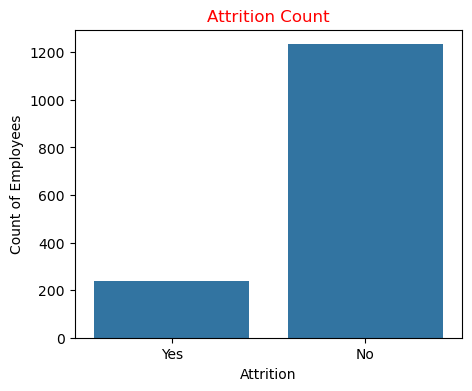

In [9]:
plt.figure(figsize=(5,4))
sns.countplot(x="Attrition", data=dset)  
plt.title("Attrition Count", c="r")
plt.xlabel("Attrition")
plt.ylabel("Count of Employees")
plt.show()

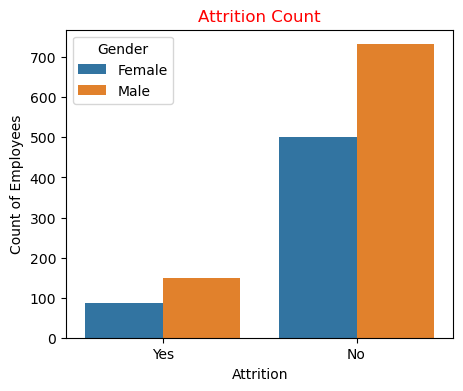

In [10]:
plt.figure(figsize=(5,4))
sns.countplot(x="Attrition",hue="Gender",data=dset)
plt.title("Attrition Count", c="r")
plt.xlabel("Attrition")
plt.ylabel("Count of Employees")
plt.show()

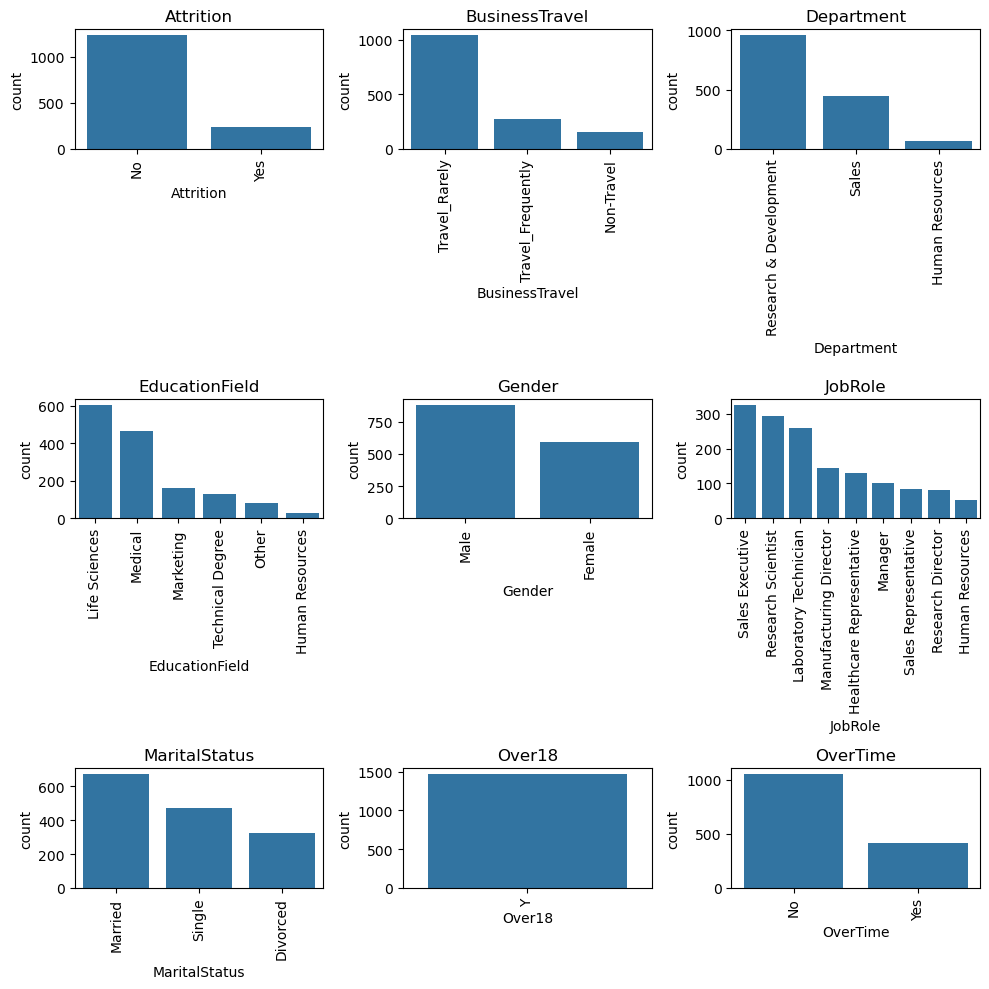

In [11]:
categorical_cols = dset.select_dtypes(include='object').columns

plt.figure(figsize=(10, 10))

for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1) 
    sns.countplot(data=dset, x=col, order=dset[col].value_counts().index)
    plt.title(col)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

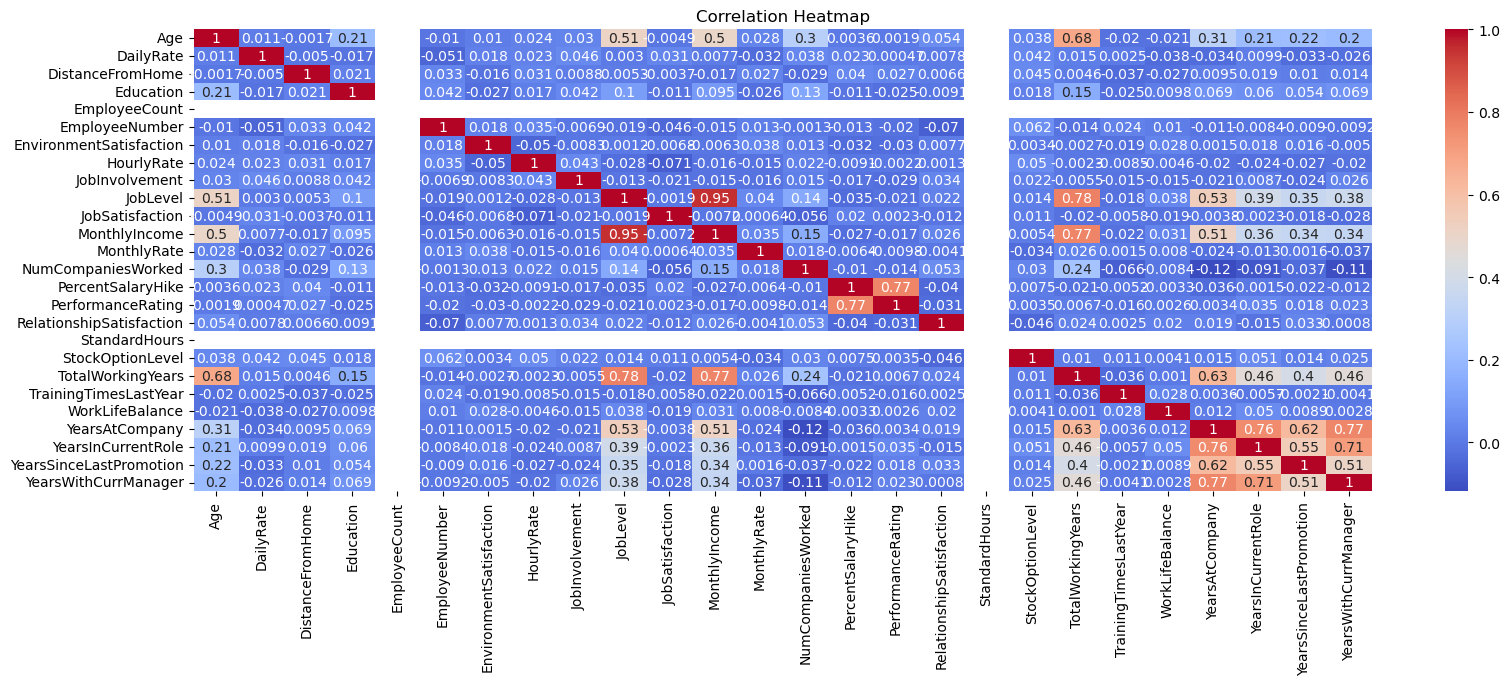

In [12]:
numeric_cols = dset.select_dtypes(include='number')

plt.figure(figsize=(19, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [15]:
def generate_insights(summary):
    prompt = f"Analyze the dataset summary and provide insights :\n\n{summary}"
    response = ollama.chat(
        model="mistral",
        messages=[{"role": "user", "content": prompt}]
    )
    return response['message']['content']  

summary = dset.describe().to_string()
insights = generate_insights(summary)

print("\n AI-Generated Insights:\n", insights)


 AI-Generated Insights:
  The dataset provided contains information about various employees, their characteristics, and job details. Here are some insights from the summary:

1. Total number of observations (employees) is 1470.
2. The mean age of employees is approximately 36.9 years, with a standard deviation of 9.14. This suggests that there's a diverse range of ages in the dataset.

3. The average daily rate and hourly rate are around $802.49 and $65.89 respectively. The mean monthly income is approximately $6502.93.

4. Employees work, on average, 11.28 hours per week (StandardHours), with a standard deviation of 3.66 hours. This indicates a wide range in the working hours of employees.

5. The mean number of companies worked is 14313.1, suggesting that employees have had multiple job experiences.

6. Employees are relatively satisfied with their work environment, relationships, work-life balance, and job satisfaction, with means ranging from 2.72 to 3.15. This suggests a generall

In [13]:
# Descriptive Statistics
summary=dset.describe(include="all").to_string()

# missing values info
missing_info = dset.isnull().sum()
missing_info_str = missing_info.to_string()

# Correlation
correlation = numeric_cols.corr().to_string()

# AI-Powered Insight Generation
def generate_ai_insights( summary, missing, corr):
    prompt = f"""
    Analyze the dataset and provide insights.
    Summary of dataset:
    {summary}
    Missing Values:
    {missing}
    Correlation Matrix:
    {corr}
    Provide:
    1. Key patterns and trends
    2. Outliers or anomalies
    3. Possible next steps for data preprocessing
    
    4. Potential business insights
    """
    
    response = ollama.chat(
        model="mistral",
        messages=[{"role": "user", "content": prompt}]
    )
    
    return response["message"]["content"]

# Generate Insights
ai_insights = generate_ai_insights(summary, missing_info_str, correlation)

print("\n AI-Generated EDA Insights:\n")
print(ai_insights)


 AI-Generated EDA Insights:

 1. Key patterns and trends:
   - Most of the variables have a normal distribution, but some (like TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, and YearsWithCurrManager) seem to be skewed towards lower values.
   - There are correlations between certain pairs of variables: for example, StockOptionLevel and TotalWorkingYears appear to be positively correlated, as do YearsAtCompany and YearsInCurrentRole.
   - Some variables (like TrainingTimesLastYear, WorkLifeBalance, and StockOptionLevel) have a significant number of missing values, which may require imputation during data preprocessing.

2. Outliers or anomalies:
   - There are a few outliers in the dataset, particularly in variables like StockOptionLevel, TotalWorkingYears, YearsAtCompany, and YearsInCurrentRole. These outliers could potentially be due to errors in data collection or represent unique cases that provide valuable insights.

3. Poss

In [18]:
import gradio as gr
def eda_analysis(file):
    df = pd.read_csv(file.name)
    summary = df.describe().to_string()
    # missing values info
    missing_info = df.isnull().sum().to_string()
    # Correlation
    numeric_cols = df.select_dtypes(include='number')
    correlation = numeric_cols.corr().to_string()
    insights=generate_ai_insights(summary,missing_info,correlation)
    return insights
demo=gr.Interface(fn=eda_analysis,inputs="file",outputs="text",title="AI-Powered EDA with Mistral")

demo.launch(share=True)

* Running on local URL:  http://127.0.0.1:7864

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.
